In [56]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [85]:
vec = {}
for p in np.linspace(0, 0.15, num=20):
    print(p)
    vec[p] = []
    for na in range(20):
        l = Lattice2D(64, geo='hexagonal', pflip=p, with_positions=False)
        l.flip_sel_edges(l.nwDict['randZERR']['G'])
        vec[p].append(l.Ne_n)

0.0
0.007894736842105263
0.015789473684210527
0.02368421052631579
0.031578947368421054
0.039473684210526314
0.04736842105263158
0.05526315789473685
0.06315789473684211
0.07105263157894737
0.07894736842105263
0.0868421052631579
0.09473684210526316
0.10263157894736842
0.1105263157894737
0.11842105263157895
0.12631578947368421
0.13421052631578947
0.14210526315789473
0.15


In [86]:
for k,v in vec.items():
    vec[k] = np.mean(v)

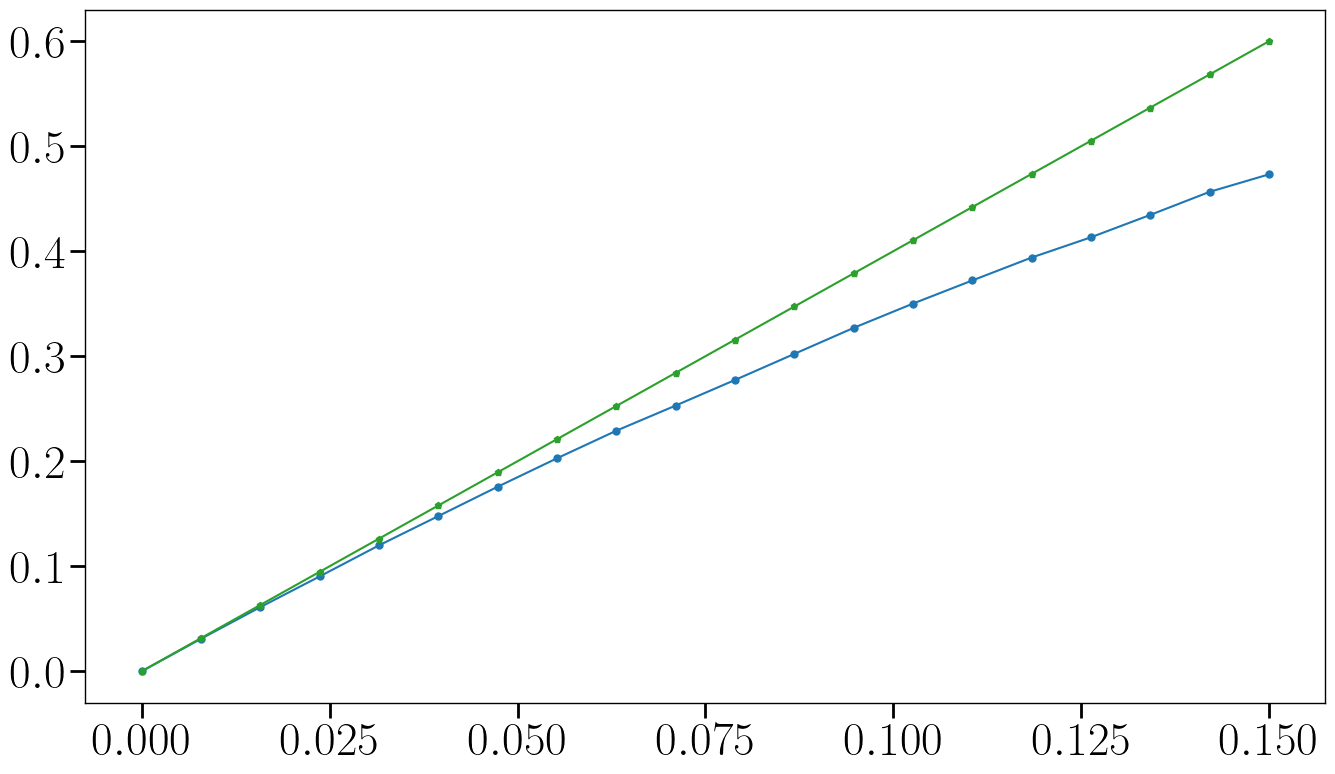

In [92]:
plt.plot(vec.keys(), np.array(list(vec.values()))/l.Ne)
plt.plot(vec.keys(), 4*np.array(list(vec.keys())))
# plt.xscale('log')
# plt.yscale('log')

In [3]:
import scipy.linalg as scla
l = Lattice2D(64)
l.flip_sel_edges(l.neg_weights_dict['rand']['G'])
def eigen(A, mode: str = 'numpy'):
    if mode == 'numpy':
        eigenValues, eigenVectors = np.linalg.eigh(A)
    elif mode.startswith('scipy'):
        if mode.endswith('sparse'):
            eigenValues, eigenVectors = scsp.linalg.eigsh(A.astype(float))
        elif mode.endswith('dense'):
            eigenValues, eigenVectors = scla.eigh(A.astype(float))
    idx = np.argsort(eigenValues)[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return (eigenValues, eigenVectors)
A = l.Adj


In [2]:
# l = Lattice2D(128, pflip=0.1, with_positions=True)
# l.flip_sel_edges(l.neg_weights_dict['randZERR']['G'])
# nx.draw(l.G, pos = l.get_pos(), edge_color=l.get_edge_color(), node_size=10)
# l.compute_k_eigvV()

In [7]:
List = [8, 16, 32, 48, 64, 96, 128, 192]
plist = np.concatenate((np.logspace(-3, np.log10(0.05), num=5),
                        np.linspace(1e-2, 0.2, num=10),
                        np.linspace(0.2, 0.5, num=5)))
geometry_cell_dict = {'squared': ['rand', 'randZERR', 'randXERR'],
                      'triangular': ['rand', 'randZERR', 'randXERR'],
                      'hexagonal': ['rand', 'randZERR', 'randXERR']}

In [29]:
REMOVAL = False
dict_max = {}
for geo, cellst in geometry_cell_dict.items():
    dict_max[geo] = {}
    for c in cellst:
        dict_max[geo][c] = {}
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data_phtra/")
            search_dir = l.phtrapath
            output_file_name = os.path.join(search_dir, f'cat_{c}.txt')
            if not os.path.exists(output_file_name):
                print(search_dir, end='\r')
                #
                matching_files = find_matching_files(search_dir, c)
                if c == 'rand':
                    matching_files = [item for item in matching_files if 'randZERR' not in item and 'randXERR' not in item]
                # Concatenate the found files into the output file
                with open(output_file_name, 'w') as outfile:
                    for fname in matching_files:
                        # Construct the full path to open the file
                        file_path = os.path.join(search_dir, fname)
                        with open(file_path, 'r') as infile:
                            outfile.write(infile.read())
            elif REMOVAL:
                try:
                    os.remove(output_file_name)
                except FileNotFoundError:
                    continue
            else:
                print("loading ", search_dir, end='\r')
                dict_max[geo][c][L] = np.loadtxt(output_file_name)
            # Optionally, write a newline character between files

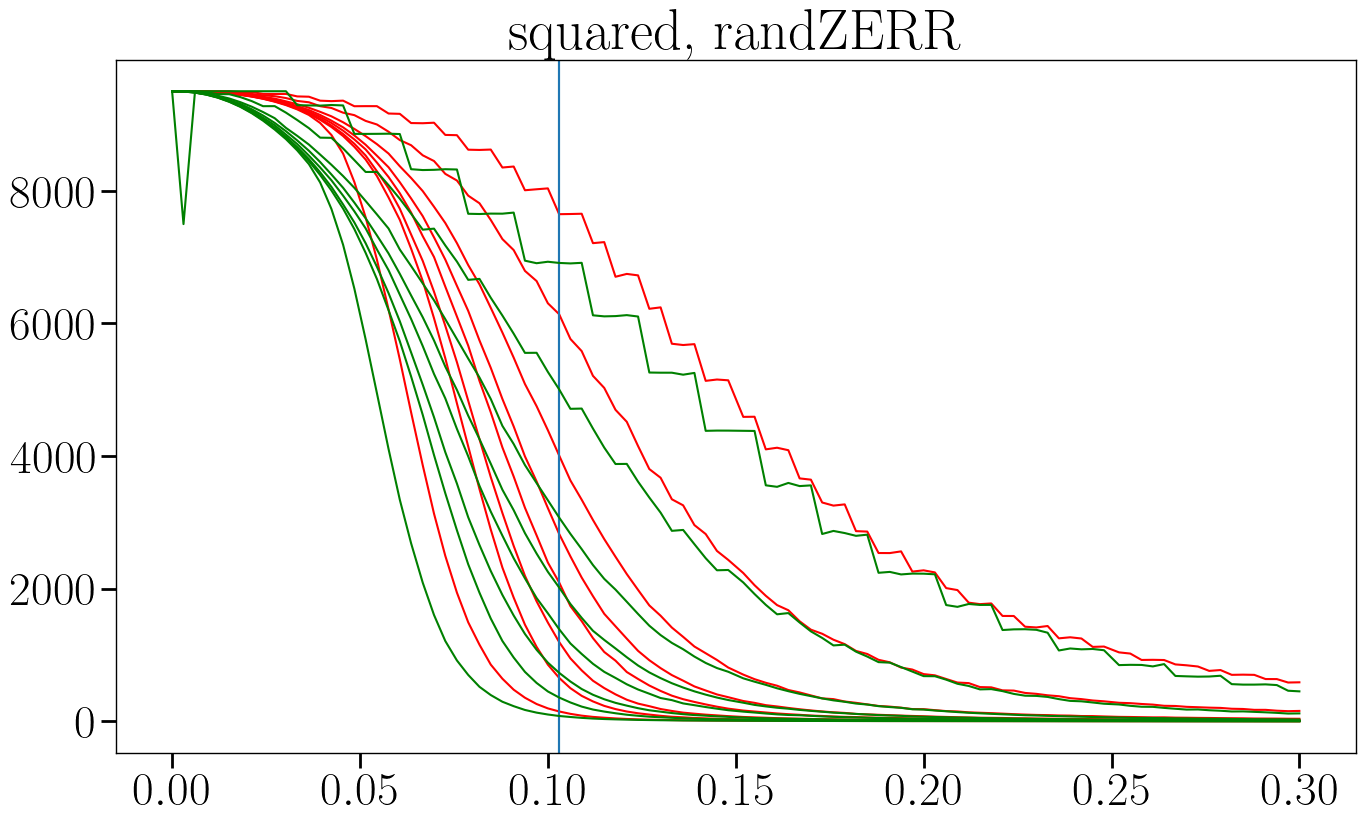

In [44]:
p_c = {'squared': 0.103,
    'triangular': 0.146,
    'hexagonal': 0.065}
geo = 'squared'
fig, ax = plt.subplots()
cellst = ['rand', 'randZERR', ]
for c, cc in zip(cellst, ['red', 'green', 'blue']):
    ax.set_title(f'{geo}, {c}')
    ax.axvline(p_c[geo])
    for L in list(dict_max[geo][c].keys()):
        arr = dict_max[geo][c][L]
        column_index = 0
        try:
            sorted_indices = np.argsort(arr[:, column_index])
            sorted_arr = arr[sorted_indices]
            if c == 'rand':
                ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
            else:
               ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
        except IndexError:
            pass

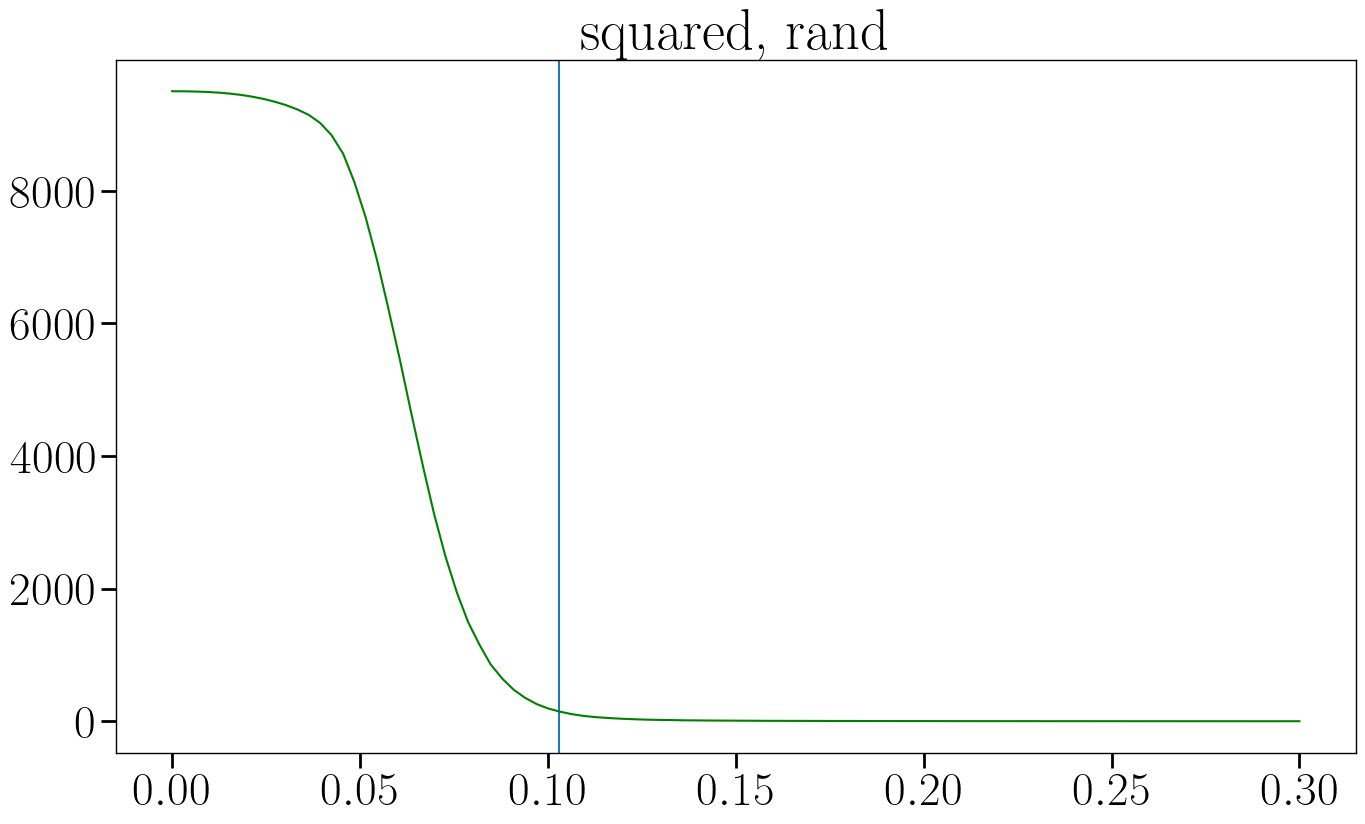

In [43]:
geo = 'squared'
fig, ax = plt.subplots()
cellst = ['rand', 'randZERR']
c = 'rand'
ax.set_title(f'{geo}, {c}')
ax.axvline(p_c[geo])

arr = dict_max[geo][c][L]
column_index = 0
try:
    sorted_indices = np.argsort(arr[:, column_index])
    sorted_arr = arr[sorted_indices]
    if c == 'rand':
        ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
    else:
        ax.plot(sorted_arr[:, 0], sorted_arr[:, 6], '-', c=cc, ms=5)
except IndexError:
    pass